# Bruno's Movies Recommendation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('/kaggle/input/movies-and-ratings-for-recommendation-system/movies.csv')
ratings = pd.read_csv('/kaggle/input/movies-and-ratings-for-recommendation-system/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.drop_duplicates()
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [6]:
ratings.drop_duplicates()
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
summed_ratings = ratings.groupby('movieId')['rating'].sum().reset_index()
summed_ratings = summed_ratings.merge(ratings['movieId'].value_counts().reset_index())
summed_ratings['mean_rating'] = summed_ratings['rating'] / summed_ratings['count']
summed_ratings['mean_rating'] = summed_ratings['mean_rating'].round(1)
summed_ratings.head()
# ratings['movieId'].value_counts()

,movieId,rating,count,mean_rating
0,1,843.0,215,3.9
1,2,377.5,110,3.4
2,3,169.5,52,3.3
3,4,16.5,7,2.4
4,5,150.5,49,3.1


In [8]:
summed_ratings.describe()

,movieId,rating,count,mean_rating
count,9724.000000,9724.000000,9724.000000,9724.000000
mean,42245.024373,36.310469,10.369807,3.262464
std,52191.137320,85.542286,22.401005,0.870338
min,1.000000,0.500000,1.000000,0.500000
25%,3245.500000,4.000000,1.000000,2.800000
50%,7300.000000,8.500000,3.000000,3.400000
75%,76739.250000,28.000000,9.000000,3.900000
max,193609.000000,1404.000000,329.000000,5.000000


In [9]:
movies = movies.merge(summed_ratings, on='movieId', how='left')
movies = movies.sort_values(by='rating', ascending=False)
movies.head()

,movieId,title,genres,rating,count,mean_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1404.0,317.0,4.4
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0,329.0,4.2
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5,307.0,4.2
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1165.5,278.0,4.2
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1161.0,279.0,4.2


In [10]:
movies['genres'].fillna('Not Specified', inplace=True)
movies['rating'].fillna(0.0, inplace=True)
movies['count'].fillna(0.0, inplace=True)
movies['mean_rating'].fillna(0.0, inplace=True)
movies

,movieId,title,genres,rating,count,mean_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1404.0,317.0,4.4
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0,329.0,4.2
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5,307.0,4.2
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1165.5,278.0,4.2
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1161.0,279.0,4.2
...,...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,0.0,0.0,0.0
5824,32160,Twentieth Century (1934),Comedy,0.0,0.0,0.0
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,0.0,0.0,0.0
5957,34482,"Browning Version, The (1951)",Drama,0.0,0.0,0.0


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
movies_for_clustering = movies.copy()
movies_for_clustering.head()

,movieId,title,genres,rating,count,mean_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1404.0,317.0,4.4
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0,329.0,4.2
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5,307.0,4.2
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1165.5,278.0,4.2
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1161.0,279.0,4.2


In [13]:
numeric_features = movies_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['title', 'genres']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='drop'
)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


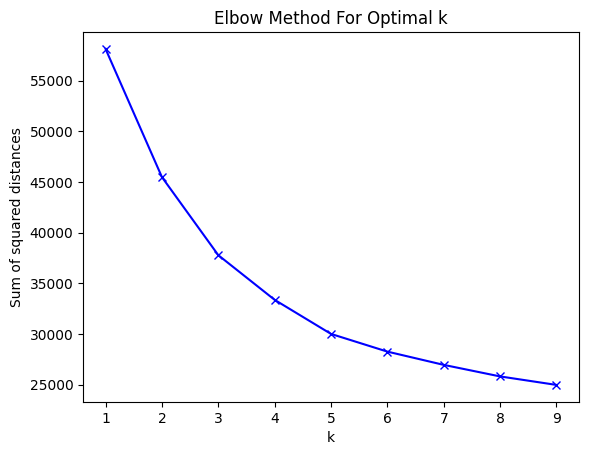

In [14]:
K = range(1, 10)
X = preprocessor.fit_transform(movies_for_clustering)
SSD = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SSD.append(km.inertia_)

# movies['genres'] = movies['genres'].str.split('|')
plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [15]:
X = preprocessor.fit_transform(movies_for_clustering)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
movies_for_clustering['cluster'] = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
movies_for_clustering.head()

,movieId,title,genres,rating,count,mean_rating,cluster
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,1404.0,317.0,4.4,2
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1370.0,329.0,4.2,2
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1288.5,307.0,4.2,2
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1165.5,278.0,4.2,2
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1161.0,279.0,4.2,2


In [17]:
def recommend_movies(movie_name, genres, num_recommendations=10):
    cluster = movies_for_clustering[movies_for_clustering['title'] == movie_name]['cluster'].iloc[0]
    genres = genres.split('|')
    recommendations_df = movies_for_clustering[
    (movies_for_clustering['cluster'] == cluster) & 
    (movies_for_clustering['rating'] > 600) &
    (movies_for_clustering['mean_rating'] >= 3.5) &
    (movies_for_clustering['genres'].str.contains('|'.join(genres))) &
    (movies_for_clustering['title'] != movie_name)
][['title', 'genres', 'mean_rating']].head(num_recommendations)
    return recommendations_df

In [18]:
recommend_movies('Pulp Fiction (1994)', 'Comedy|Crime|Drama|Thriller').sort_values('mean_rating', ascending=False)

,title,genres,mean_rating
277,"Shawshank Redemption, The (1994)",Crime|Drama,4.4
2226,Fight Club (1999),Action|Crime|Drama|Thriller,4.3
314,Forrest Gump (1994),Comedy|Drama|Romance|War,4.2
1939,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.2
510,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.2
461,Schindler's List (1993),Drama|War,4.2
46,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.2
97,Braveheart (1995),Action|Drama|War,4.0
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.9
418,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.8
